<a href="https://colab.research.google.com/github/Brokencarer/vehicle-door-closing-energy-calculation/blob/main/Energy_consumption_of_vehicle_door.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from __future__ import division
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#FD6D5A', '#FEB40B', '#6DC354',  '#319975',
'#8C8FD5',  'pink','#994487', '#518CD8'])

In [ ]:
V_c = float(input("Enter vehicle volume"))
H = float(input("Door height"))
R_r = float(input("Door Radius "))
m_door = float(input("Door mass"))

#front_angle = float(input('Front dip angle'))
#in_angle = float(input('Inwards dip angle'))

pt1 = input('First point position').split(',')
pt2 = input('Second point position').split(',')
pt_g = input('Mass center position').split(',')

#大车
#0.523, 0.864, 0.638
#0.529, 0.879, 0.205
#1.008, 0.829, 0.575

#小车
#0.42597, 0.7509,0.57368
#0.43285, 0.77157, 0.17928
#0.94627, 0.70813, 0.55970

#Force ET7
# 0.404175, 0.920343, 0.565542
# 0.390564, 0.933946, 0.176017
# 0.907446, 0.869609, 0.4887302
#2.93, 0.98, 1.114, 38.485

#DOM
#上铰链点/mm  0.388438, 0.910434, 0.637692
#下铰链点/mm   0.382103, 0.921034, 0.200834
#重心 0.853681, 0.800746, 0.524226
# 37.126

#dom 后门 31.56
# 1.477657, 0.891135, 0.644663
# 1.464938, 0.8982, 0.259924
# 1.939610,0.818629,0.556638

#blanc 参数
#前门 体积 3.433 泄压阀 0.0172 车门面积1.391
#长宽1.282 1.415
#旋转半径 0.926
# 0.411109, 0.936035, 0.668298
# 0.402956, 0.946765, 0.258501
#前门重心 0.958231, 0.83548, 0.61777
#45.52


#后门 1.529385, 0.923619, 0.757814
# 1.503596, 0.932822, 0.230525
#长宽1.230 1.406 面积1.44 重41.911
# 1.9942, 0.8288, 0.66083


Enter vehicle volume3.2
Door height1.1
Door Radius 1.2
Door mass37.126
First point position0.388438, 0.910434, 0.637692
Second point position0.382103, 0.921034, 0.200834
Mass center position0.853681, 0.800746, 0.524226


In [ ]:
center_tt = [float(pt_g[0])-float(pt2[0]) ,float(pt_g[1])-float(pt2[1]) ,float(pt_g[2])-float(pt2[2])]

pt1_xx = float(pt1[0])
pt1_yy = float(pt1[1])
pt1_zz = float(pt1[2])
pt2_xx = float(pt2[0])
pt2_yy = float(pt2[1])
pt2_zz = float(pt2[2])

ptg_xx = float(pt_g[0])
ptg_yy = float(pt_g[1])
ptg_zz = float(pt_g[2])


axx = (pt1_xx - pt2_xx)/math.sqrt((pt1_xx - pt2_xx)**2+(pt1_yy - pt2_yy)**2+(pt1_zz - pt2_zz)**2)
ayy = (pt1_yy - pt2_yy)/math.sqrt((pt1_xx - pt2_xx)**2+(pt1_yy - pt2_yy)**2+(pt1_zz - pt2_zz)**2)
azz = (pt1_zz - pt2_zz)/math.sqrt((pt1_xx - pt2_xx)**2+(pt1_yy - pt2_yy)**2+(pt1_zz - pt2_zz)**2)

gxx = center_tt[0]
gyy = center_tt[1]
gzz = center_tt[2]


ddtheta = -28*3.14159/180
#ddtheta = -65*3.14159/180



new_xx = (axx*axx*(1-math.cos(-ddtheta))+math.cos(-ddtheta))*gxx+(axx*ayy*(1-math.cos(-ddtheta))-azz*math.sin(-ddtheta))*gyy+ (axx*azz*(1-math.cos(-ddtheta))+ayy*math.sin(-ddtheta))*gzz
new_yy = (axx*ayy*(1-math.cos(-ddtheta))+azz*math.sin(-ddtheta))*gxx+(ayy*ayy*(1-math.cos(-ddtheta))+math.cos(-ddtheta))*gyy+ (ayy*azz*(1-math.cos(-ddtheta))-axx*math.sin(-ddtheta))*gzz
new_zz = (axx*azz*(1-math.cos(-ddtheta))-ayy*math.sin(-ddtheta))*gxx+(ayy*azz*(1-math.cos(-ddtheta))+axx*math.sin(-ddtheta))*gyy+(azz*azz*(1-math.cos(-ddtheta))+math.cos(-ddtheta))*gzz

m_door * 9.8 * (gzz-new_zz)


-2.0600820158786655

<Axes: title={'center': 'Polynomial'}, xlabel='Angle'>

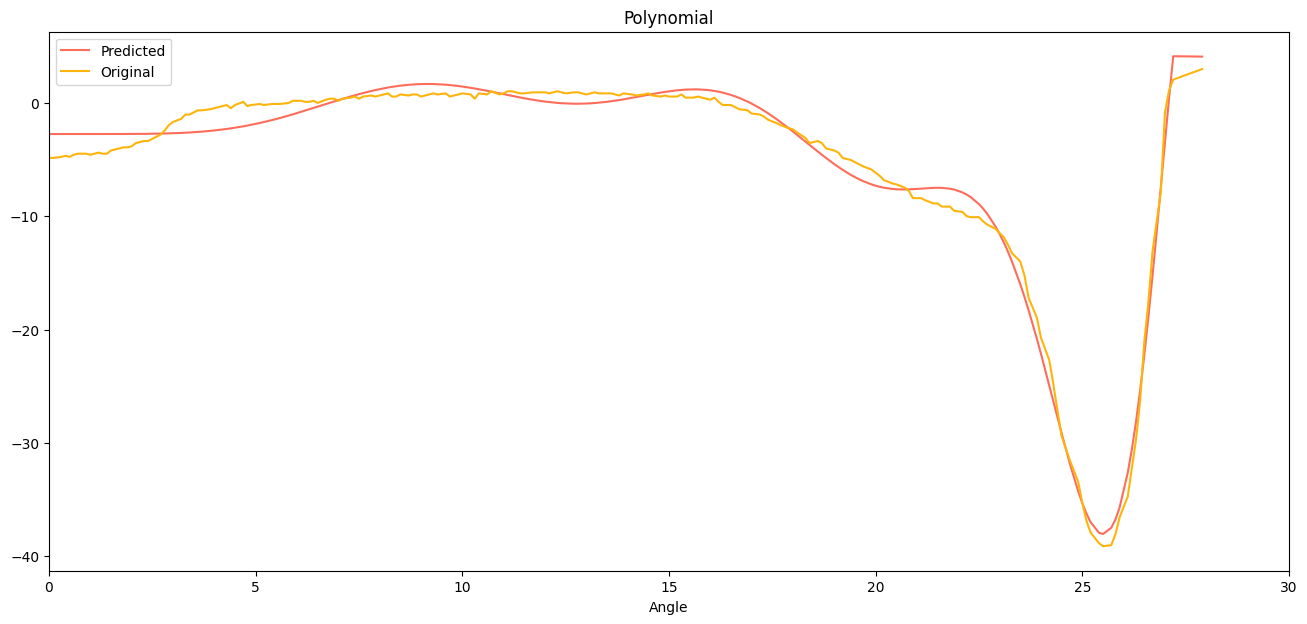

In [ ]:
dataset = pd.read_excel("test_force.xlsx")
dataset.drop(axis = 0, index = 0,inplace = True)
dataset.drop(dataset.head(285).index, inplace = True)

LR = LinearRegression()
poly = PolynomialFeatures(degree =14)

X = dataset.drop(columns = ['Force(N)'], axis = 1).values
y = dataset['Force(N)'].values

X_poly = poly.fit_transform(X)
LR.fit(X_poly, y)
y_pred = LR.predict(X_poly)
resultLR_df = pd.DataFrame(columns=['Predicted'])
resultLR_df['Predicted'] = y_pred
resultLR_df['Original'] = y
resultLR_df['Angle'] = dataset['Angle(deg)'].values
resultLR_df.set_index(['Angle'], inplace = True)
resultLR_df.plot(figsize=(16,7), kind = 'line',xlim = [0, 30],title = 'Polynomial')

<Axes: title={'center': 'Random Forest'}, xlabel='Angle'>

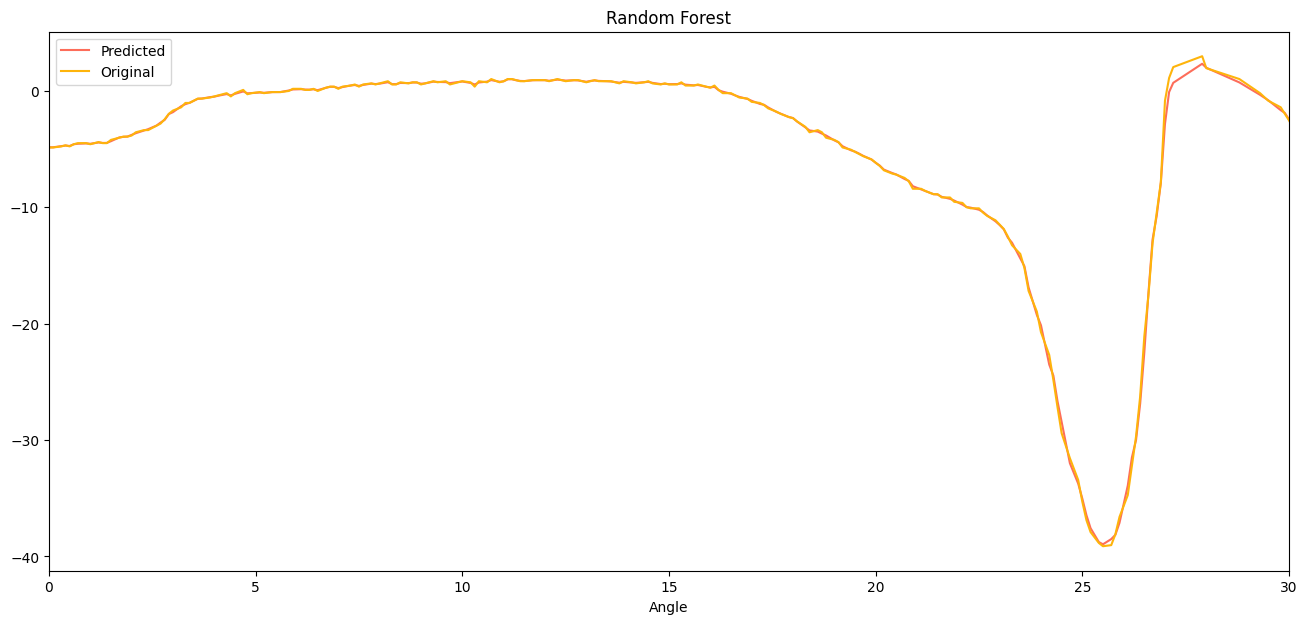

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dataset = pd.read_excel("test_force.xlsx")
dataset.drop(axis = 0, index = 0,inplace = True)
dataset.drop(dataset.head(270).index, inplace = True)



X = dataset.drop(columns = ['Force(N)'], axis = 1).values
y = dataset['Force(N)'].values


regr = RandomForestRegressor()

regr.fit(X, y)
y_pred = regr.predict(X)
resultLR_df = pd.DataFrame(columns=['Predicted'])
resultLR_df['Predicted'] = y_pred
resultLR_df['Original'] = y
resultLR_df['Angle'] = dataset['Angle(deg)'].values
resultLR_df.set_index(['Angle'], inplace = True)
resultLR_df.plot(figsize=(16,7), kind = 'line',xlim = [0, 30],title = 'Random Forest')


<Axes: title={'center': 'Random Forest'}, xlabel='Angle'>

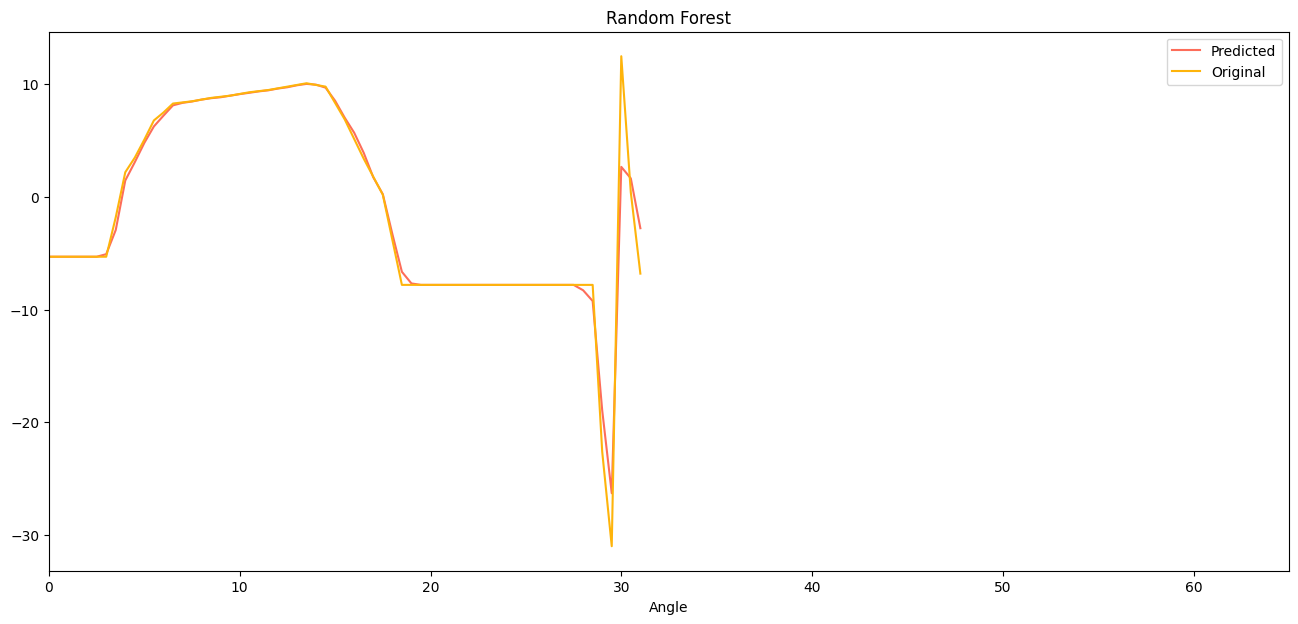

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#dataset = pd.read_excel("test_force.xlsx")
#dataset = pd.read_excel("dom_checker.xlsx").head(60)
#dataset = pd.read_excel("checker_long.xlsx").head(70)
dataset = pd.read_excel("check_0524.xlsx").head(63)    #DOM关门
#dataset = pd.read_excel("check_openF.xlsx").head(133)    #DOM前门开启
#dataset.drop(axis = 0, index = 0,inplace = True)
#dataset.drop(dataset.head(270).index, inplace = True)



X = dataset.drop(columns = ['Force(N)'], axis = 1).values
y = dataset['Force(N)'].values


regr = RandomForestRegressor(n_estimators= 31)

regr.fit(X, y)
y_pred = regr.predict(X)
resultLR_df = pd.DataFrame(columns=['Predicted'])
resultLR_df['Predicted'] = y_pred
resultLR_df['Original'] = y
resultLR_df['Angle'] = dataset['Angle(deg)'].values
resultLR_df.set_index(['Angle'], inplace = True)
resultLR_df.plot(figsize=(16,7), kind = 'line',xlim = [0, 65],title = 'Random Forest')

<Axes: title={'center': 'Random Forest'}, xlabel='Angle'>

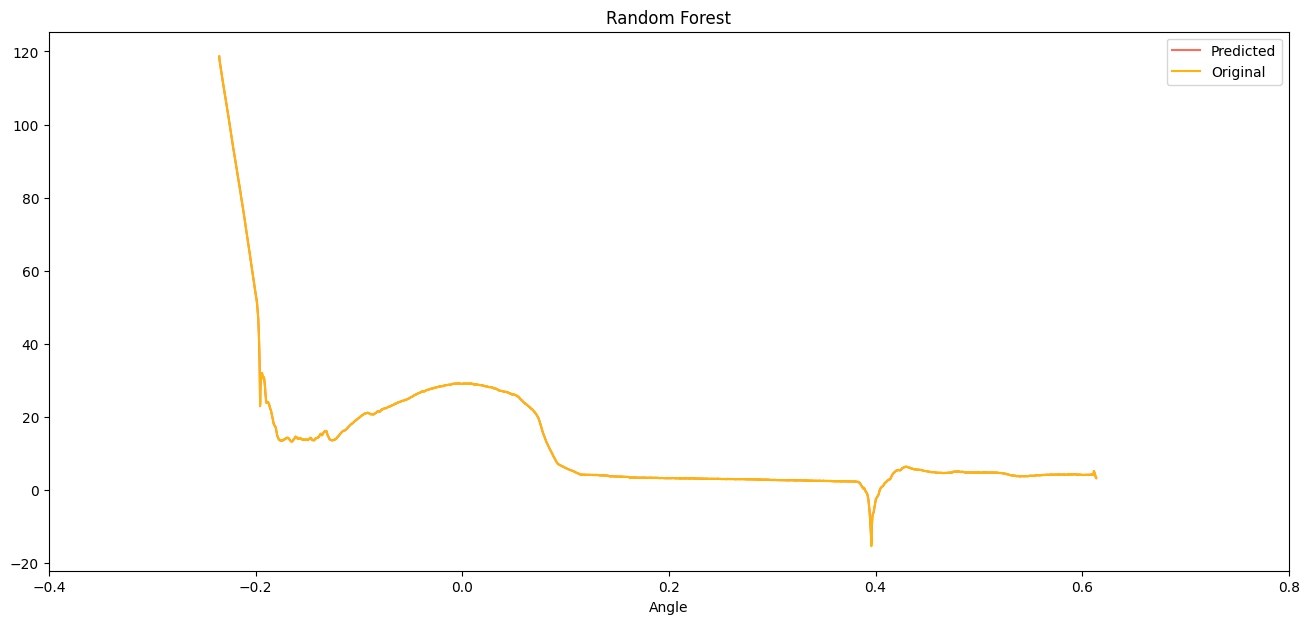

In [ ]:
dataset = pd.read_excel("lock_force.xlsx")
dataset.drop(axis = 0, index = 0,inplace = True)
#dataset.drop(dataset.head(270).index, inplace = True)
X = dataset.drop(columns = ['Force'], axis = 1).values
y = dataset['Force'].values
regr_lock = RandomForestRegressor()
regr_lock.fit(X, y)
y_pred = regr_lock.predict(X)
resultLR_df = pd.DataFrame(columns=['Predicted'])
resultLR_df['Predicted'] = y_pred
resultLR_df['Original'] = y
resultLR_df['Angle'] = dataset['Angle'].values
resultLR_df.set_index(['Angle'], inplace = True)
resultLR_df.plot(figsize=(16,7), kind = 'line',xlim = [-0.4, 0.8],title = 'Random Forest')

In [ ]:
pt1_x = float(pt1[0])
pt1_y = float(pt1[1])
pt1_z = float(pt1[2])
pt2_x = float(pt2[0])
pt2_y = float(pt2[1])
pt2_z = float(pt2[2])
ptg_x = float(pt_g[0])
ptg_y = float(pt_g[1])
ptg_z = float(pt_g[2])
R_rotation = (math.sqrt((ptg_y -0.5* pt2_y - 0.5* pt1_y)**2+(ptg_x - 0.5*pt2_x - 0.5* pt1_x)**2+(ptg_z -0.5*pt2_z - 0.5* pt1_z)**2))
R_rotation

0.4936069975428326

In [ ]:
J =13+m_door*R_rotation**2

w_0 = (3.3*2/J)**0.5
v_0 = w_0*R_rotation
#v_0 = 0.289
v_t = v_0
dt = 0.00003
r = 1.4
R = 287
theta = 28*3.1415/180
#A_0 = R_r*theta*(H+R_r)
A_p = 0.0055+0.0055


#DOM 0.0089*2 Blanc 0.0172


p_0 = 101.3*1000
p_1 = 101.3*1000

q_m = 0
S = 1
W = (1+(r-1)/r)**(r/(r-1))
Cd = 1.17

m_0 = 1.205*(V_c+ 0.25*H* (R_r**2) /2)
t_start = 0

i = 0
a_theta = []
a_v = []
a_i = []
a_p = []
a_q = []
a_alpha = []
a_seal = []

In [ ]:
dataset = pd.read_excel("test_force.xlsx")
dataset.drop(axis = 0, index = 0,inplace = True)
dataset.drop(dataset.head(280).index, inplace = True)
dataset

,Angle(deg),Force(N)
281,29.8,-1.400560
282,29.5,-0.840336
283,29.3,-0.186741
284,28.8,1.027077
285,28.0,1.960784
...,...,...
491,0.5,-4.761905
492,0.4,-4.668534
493,0.3,-4.761905
494,0.1,-4.855275


In [ ]:
def wind(p_2, V_2, m_1):

    if (p_2 - p_0> 80):
        coeff = 0.8
    else:
        coeff = (p_2 - p_0)/500

    A_0 = R_r*(theta>0)*theta*(H+R_r)+0.00 #0.001短降
    A = A_0 + coeff*A_p


    #EFFICIENT AREA
    A = 1 * A

    S = p_2/p_0

    if (S <= 1):
        q_mass = 0
    elif (S< W):
        q_mass= A * math.sqrt(2*r/(r-1)*p_0*1.205*(S**(2*(r-1)/r) - S**((r-1)/r)))
    else:
        q_mass = A * 1.205*S**(1/r)*math.sqrt((2*r/(r+1))*R*293)

    V_2 = V_2 - (2*v_t)*dt*R_r*H/2
    m_1 = m_1 - q_mass*dt
    rou = m_1/V_2
    F_drag = 0.5*rou*((v_t*2)**2)*Cd*(H*R_r)
    p_2 = m_1*R*293/V_2
    alpha = 0.5 * (p_2 - 1* p_0)*H*R_r**2 /J + 0.5 * F_drag * R_r /J

    #v_t = v_t - alpha*dt
    energy = 0.5*J*(v_t/R_rotation)**2 - 0.5*J*((v_t-alpha*dt)/R_rotation)**2
    return alpha, m_1, V_2, p_2, q_mass, energy

##------------------------------------------------------------------------------------------------------------#####
def wind2(p_2, V_2, m_1):

    if (p_2 - p_0> 50):
        q_v =  0.4*(p_2 - p_0)+40    #流通量 单位L/s
    else:
        q_v =  1.2*(p_2 - p_0)


    A_0 = R_r*(theta>0)*theta*(H+R_r)+0.00 #0.001短降
    A = A_0


    #EFFICIENT AREA
    A = 1 * A

    S = p_2/p_0

    if (S <= 1):
        q_mass = 0
    elif (S< W):
        q_mass= A * math.sqrt(2*r/(r-1)*p_0*1.205*(S**(2*(r-1)/r) - S**((r-1)/r))) + q_v/1000*1.205*2
    else:
        q_mass = A * 1.205*S**(1/r)*math.sqrt((2*r/(r+1))*R*293) + q_v/1000*1.205*2

    V_2 = V_2 - (2*v_t)*dt*R_r*H/2
    m_1 = m_1 - q_mass*dt
    rou = m_1/V_2
    F_drag = 0.5*rou*((v_t*2)**2)*Cd*(H*R_r)
    p_2 = m_1*R*293/V_2
    alpha = 0.5 * (p_2 - 1* p_0)*H*R_r**2 /J + 0.5 * F_drag * R_r /J

    #v_t = v_t - alpha*dt
    energy = 0.5*J*(v_t/R_rotation)**2 - 0.5*J*((v_t-alpha*dt)/R_rotation)**2
    return alpha, m_1, V_2, p_2, q_mass, energy
##------------------------------------------------------------------------------------------------------------#####
def wind3(p_2, V_2, m_1):

    if (p_2 - p_0> 60):
        q_v =  0.308*(p_2 - p_0)+42    #流通量 单位L/s
    else:
        q_v =  0.61*(p_2 - p_0)+20


    A_0 = R_r*(theta>0)*theta*(H+R_r)+0.00 #0.001短降
    A = A_0


    #EFFICIENT AREA
    A = 1 * A

    S = p_2/p_0

    if (S <= 1):
        q_mass = 0
    elif (S< W):
        q_mass= A * math.sqrt(2*r/(r-1)*p_0*1.205*(S**(2*(r-1)/r) - S**((r-1)/r))) + q_v/1000*1.205*2
    else:
        q_mass = A * 1.205*S**(1/r)*math.sqrt((2*r/(r+1))*R*293) + q_v/1000*1.205*2

    V_2 = V_2 - (2*v_t)*dt*R_r*H/2
    m_1 = m_1 - q_mass*dt
    rou = m_1/V_2
    F_drag = 0.5*rou*((v_t*2)**2)*Cd*(H*R_r)
    p_2 = m_1*R*293/V_2
    alpha = 0.5 * (p_2 - 1* p_0)*H*R_r**2 /J + 0.5 * F_drag * R_r /J

    #v_t = v_t - alpha*dt
    energy = 0.5*J*(v_t/R_rotation)**2 - 0.5*J*((v_t-alpha*dt)/R_rotation)**2
    return alpha, m_1, V_2, p_2, q_mass, energy
##------------------------------------------------------------------------------------------------------------#####
def wind4(p_2, V_2, m_1):

    q_v = -1/1000*(p_2 - p_0)**2+3.4*(p_2 - p_0)/20


    A_0 = R_r*(theta>0)*theta*(H+R_r)+0.00 #0.001短降
    A = A_0


    #EFFICIENT AREA
    A = 1 * A

    S = p_2/p_0

    if (S <= 1):
        q_mass = 0
    elif (S< W):
        q_mass= A * math.sqrt(2*r/(r-1)*p_0*1.205*(S**(2*(r-1)/r) - S**((r-1)/r))) + q_v*2/60
    else:
        q_mass = A * 1.205*S**(1/r)*math.sqrt((2*r/(r+1))*R*293) + q_v*2/60

    V_2 = V_2 - (2*v_t)*dt*R_r*H/2
    m_1 = m_1 - q_mass*dt
    rou = m_1/V_2
    F_drag = 0.5*rou*((v_t*2)**2)*Cd*(H*R_r)
    p_2 = m_1*R*293/V_2
    alpha = 0.5 * (p_2 - 1* p_0)*H*R_r**2 /J + 0.5 * F_drag * R_r /J

    #v_t = v_t - alpha*dt
    energy = 0.5*J*(v_t/R_rotation)**2 - 0.5*J*((v_t-alpha*dt)/R_rotation)**2
    return alpha, m_1, V_2, p_2, q_mass, energy
##------------------------------------------------------------------------------------------------------------#####
def wind5(p_2, V_2, m_1):

    if (p_2 - p_0> 75):
        q_v =  0.34*(p_2 - p_0)+ 40   #流通量 单位L/s
    elif (p_2 - p_0> 25) :
        q_v =  0.6*(p_2 - p_0)+ 16
    else:
        q_v =  25/31*(p_2 - p_0)

    A_0 = R_r*(theta>0)*theta*(H+R_r)+0.00 #0.001短降
    A = A_0


    #EFFICIENT AREA
    A = 1 * A

    S = p_2/p_0

    if (S <= 1):
        q_mass = 0
    elif (S< W):
        q_mass= A * math.sqrt(2*r/(r-1)*p_0*1.205*(S**(2*(r-1)/r) - S**((r-1)/r))) + q_v/1000*1.205*1.6
    else:
        q_mass = A * 1.205*S**(1/r)*math.sqrt((2*r/(r+1))*R*293) + q_v*2/60

    V_2 = V_2 - (2*v_t)*dt*R_r*H/2
    m_1 = m_1 - q_mass*dt
    rou = m_1/V_2
    F_drag = 0.5*rou*((v_t*2)**2)*Cd*(H*R_r)
    p_2 = m_1*R*293/V_2
    alpha = 0.5 * (p_2 - 1* p_0)*H*R_r**2 /J + 0.5 * F_drag * R_r /J

    #v_t = v_t - alpha*dt
    energy = 0.5*J*(v_t/R_rotation)**2 - 0.5*J*((v_t-alpha*dt)/R_rotation)**2
    return alpha, m_1, V_2, p_2, q_mass, energy

##------------------------------------------------------------------------------------------------------------#####
def velocity(w_alpha, g_alpha, s_alpha, c_alpha, l_alpha, old_velocity):
#def velocity(w_alpha, g_alpha, s_alpha, old_velocity):
    new_velocity = old_velocity + (g_alpha - w_alpha + s_alpha + c_alpha + l_alpha) *dt * R_rotation
    #new_velocity = old_velocity + (g_alpha - w_alpha + s_alpha) *dt * R_rotation


    return new_velocity

#------------------------------------------------------------------------------------------------------------------------------
def gravity(center_t):

    #ptg_x = float(ptg[0])
    #ptg_y = float(ptg[1])
    ax = (pt1_x - pt2_x)/math.sqrt((pt1_x - pt2_x)**2+(pt1_y - pt2_y)**2+(pt1_z - pt2_z)**2)
    ay = (pt1_y - pt2_y)/math.sqrt((pt1_x - pt2_x)**2+(pt1_y - pt2_y)**2+(pt1_z - pt2_z)**2)
    az = (pt1_z - pt2_z)/math.sqrt((pt1_x - pt2_x)**2+(pt1_y - pt2_y)**2+(pt1_z - pt2_z)**2)
    #ptg_z = float(ptg[2])t1_y - pt2_y)**2+(pt1_z - pt2_z)**2)
    gx = center_t[0]
    gy = center_t[1]
    gz = center_t[2]

    dtheta =  v_t*dt/R_rotation
    new_x = (ax*ax*(1-math.cos(-dtheta))+math.cos(-dtheta))*gx+(ax*ay*(1-math.cos(-dtheta))-az*math.sin(-dtheta))*gy+ (ax*az*(1-math.cos(-dtheta))+ay*math.sin(-dtheta))*gz
    new_y = (ax*ay*(1-math.cos(-dtheta))+az*math.sin(-dtheta))*gx+(ay*ay*(1-math.cos(-dtheta))+math.cos(-dtheta))*gy+ (ay*az*(1-math.cos(-dtheta))-ax*math.sin(-dtheta))*gz
    new_z = (ax*az*(1-math.cos(-dtheta))-ay*math.sin(-dtheta))*gx+(ay*az*(1-math.cos(-dtheta))+ax*math.sin(-dtheta))*gy+(az*az*(1-math.cos(-dtheta))+math.cos(-dtheta))*gz

    w = dtheta/dt

    new_w = math.sqrt(w**2+(2*m_door*9.8*(gz-new_z))/J)
    alpha =(new_w - w)/dt
    energy = (gz - new_z)*m_door*9.8


    center_t = [new_x, new_y, new_z]
    return alpha, center_t, energy

#------------------------------------------------------------------------------------------------------------------------------------
def seal():
    if theta < 10*3.14159/180:
        work1 = ((10-theta*180/3.14159)**3 - (10-theta*180/3.14159+v_t*dt/R_rotation*180/3.14159)**3)/1000*1.3
        work2 = (v_t**2/0.23)*work1
        work = work1+work2
        w = v_t/R_rotation
        new_w = math.sqrt(w**2+(2*work)/J)
        alpha = (new_w - w)/dt
        #alpha = 0
    else:
        alpha = 0
        work = 0

    return alpha,work

##-------------------------------------------------------------------------------------------------------------------------------------------
def friction():
    Torque_hinge = 3
    alpha = Torque_hinge/J
    #new_velocity = old_velocity-alpha*dt*R_rotation
    #work = -old_velocity*J*alpha*dt/R_rotation +0.5*J*(alpha**2)*(dt**2)
    work = -v_t*J*alpha*dt/R_rotation +0.5*J*(alpha**2)*(dt**2)
    return work



In [ ]:
def checking():
    force = regr.predict(pd.DataFrame([theta*180/3.1415926],columns=['aa']))[0]
    moment = force * R_r
    alpha  = moment/J*(theta>0)
    energy = v_t/R_rotation*moment*dt
    return alpha, energy
#----------------------------------------------------------------------------------------------------------------------------------------
def check_energy_total2():
    total_energy = 0
    for i in range(560):
      force = regr.predict(pd.DataFrame([i/20],columns=['aa']))[0]
      moment = force
      energy = 0.05*moment/180*3.1415926
      total_energy = energy +total_energy
    return total_energy
#----------------------------------------------------------------------------------------------------------------------------------------
def check_energy_total():
    total_energy = 0
    for i in range(650):
      force = regr.predict(pd.DataFrame([i/10],columns=['aa']))[0]
      moment = force
      energy = 0.1*moment/180*3.1415926
      total_energy = energy +total_energy
    return total_energy

#----------------------------------------------------------------------------------------------------------------------------------------
def lock():
    force = regr_lock.predict(pd.DataFrame([theta*180/3.1415926],columns=['aa']))[0]
    moment = -force * R_r
    alpha  = moment/J*(theta>-0.2*3.1415926/180)*(theta<0.6*3.1415926/180)
    moment = alpha*J
    energy = v_t/R_rotation*moment*dt
    return alpha, energy
##------------------------------------------------------------------------------------------------------------#####

def velocity_energy(w_energy, g_energy, s_energy, c_energy, l_energy, f_energy, old_velocity):
#def velocity(w_alpha, g_alpha, s_alpha, old_velocity):
    old_energy = 0.5 * J * (old_velocity/R_rotation)**2
    new_energy = old_energy - w_energy+g_energy+s_energy + c_energy +l_energy +f_energy
    new_velocity = (new_energy*2/J)**0.5 *R_rotation
    #new_velocity = old_velocity + (g_alpha - w_alpha + s_alpha) *dt * R_rotation


    return new_velocity

#------------------------------------------------------------------------------------------------------------------------------
def checking_moment():
    moment = regr.predict(pd.DataFrame([theta*180/3.1415926],columns=['aa']))[0]
    alpha  = moment/J*(theta>0)
    energy = v_t/R_rotation*moment*dt
    return alpha, energy
###

In [ ]:
pt1_x = float(pt1[0])
pt1_y = float(pt1[1])
pt1_z = float(pt1[2])
pt2_x = float(pt2[0])
pt2_y = float(pt2[1])
pt2_z = float(pt2[2])
ptg_x = float(pt_g[0])
ptg_y = float(pt_g[1])
ptg_z = float(pt_g[2])
R_rotation = (math.sqrt((ptg_y -0.5* pt2_y - 0.5* pt1_y)**2+(ptg_x - 0.5*pt2_x - 0.5* pt1_x)**2+(ptg_z -0.5*pt2_z - 0.5* pt1_z)**2))
R_rotation

0.4936069975428326

In [ ]:
while theta > -0.23*3.1415926/180:

    if (i == 0):
        pressure = p_0
        volume = V_c+ 0.25*H* (R_r**2) /2
        mass_air = m_0
        new_center = [new_xx, new_yy, new_zz]

        pt1_x = float(pt1[0])
        pt1_y = float(pt1[1])
        pt1_z = float(pt1[2])
        pt2_x = float(pt2[0])
        pt2_y = float(pt2[1])
        pt2_z = float(pt2[2])
        ptg_x = float(pt_g[0])
        ptg_y = float(pt_g[1])
        ptg_z = float(pt_g[2])

    #R_rotation = (math.sqrt((ptg_y - pt2_y)**2+(ptg_x - pt2_x)**2))
    R_rotation = (math.sqrt((ptg_y -0.5* pt2_y - 0.5* pt1_y)**2+(ptg_x - 0.5*pt2_x - 0.5* pt1_x)**2+(ptg_z -0.5*pt2_z - 0.5* pt1_z)**2))
    theta = theta - v_t*dt/R_rotation

    wind_alpha, mass_air, volume, pressure , q_m, wind_energy = wind(pressure,volume, mass_air)
    #wind_alpha, mass_air, volume, pressure , q_m, wind_energy = wind5(pressure,volume, mass_air)

    gravity_alpha, new_center, gravity_energy = gravity(new_center)

    seal_alpha,seal_energy = seal()

    checking_alpha, checking_energy = checking()

    lock_alpha, lock_energy = lock()

    friction_energy = friction()

    #v_t = velocity(wind_alpha, gravity_alpha, seal_alpha,v_t)
    #v_t = velocity(wind_alpha, gravity_alpha, seal_alpha, checking_alpha, lock_alpha, v_t)
    v_t = velocity_energy(wind_energy, gravity_energy, seal_energy, checking_energy, lock_energy, friction_energy, v_t)
    #v_t = velocity_energy(0, gravity_energy, 0, checking_energy, 0, 0, v_t)


    a_alpha.append(gravity_alpha - wind_alpha)
    a_theta.append(theta*180/3.1415)
    a_v.append(v_t)
    a_i.append(i*dt)
    a_p.append(pressure-101300)
    a_q.append(q_m)
    #a_seal.append(seal_work)
    i = i+1
    if (v_t < 0.01):
        break

In [ ]:
a_theta[-1]

-0.07812072804269712

In [ ]:
[theta, v_t]

[-0.0013634237063674056, 0.009896487579345338]

Text(0, 0.5, 'Velocity')

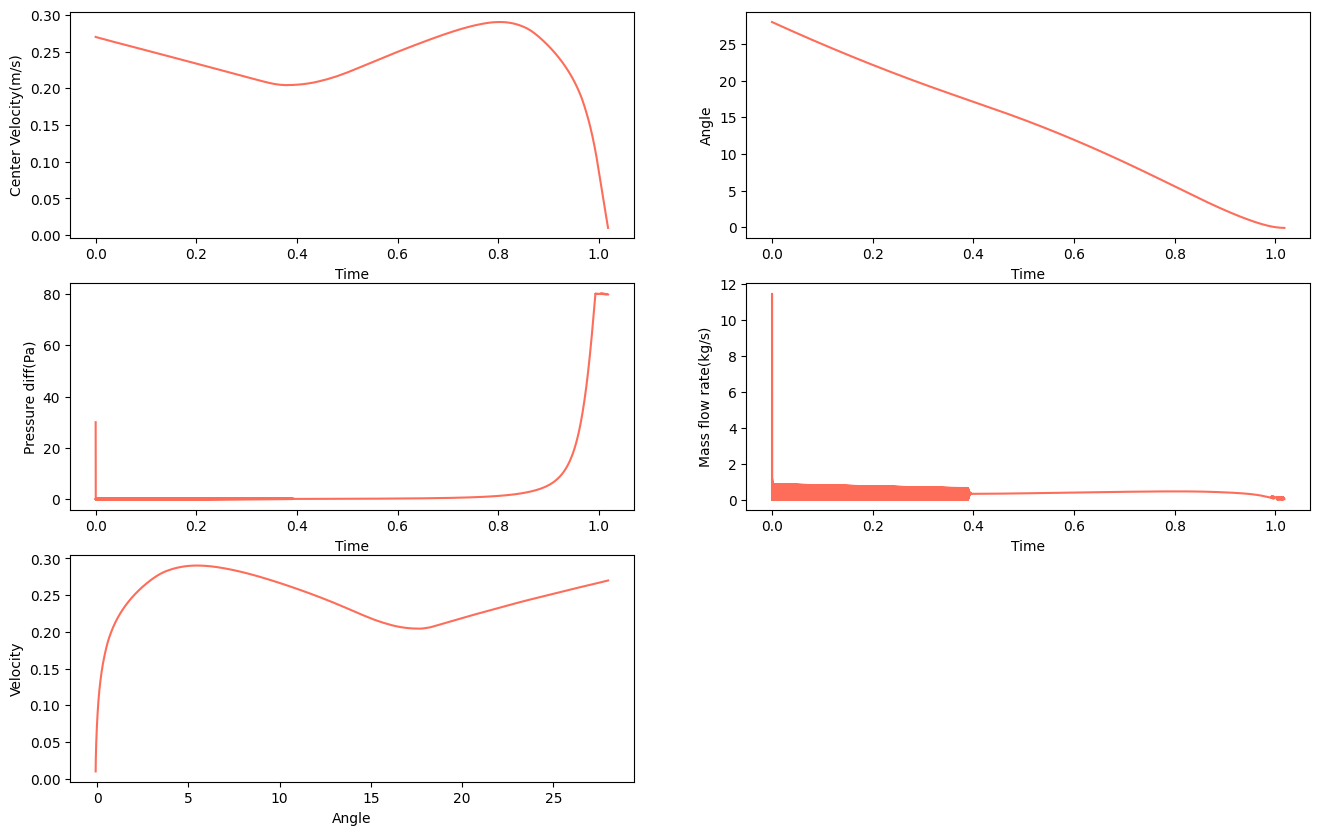

In [ ]:
plt.figure(figsize = (16,10))
ax1 = plt.subplot(3,2,1)
plt.plot(a_i,a_v)
plt.xlabel('Time')
plt.ylabel('Center Velocity(m/s)')

ax2 = plt.subplot(3,2,2)
plt.plot(a_i,a_theta)
plt.xlabel('Time')
plt.ylabel('Angle')

ax3 = plt.subplot(3,2,3)
plt.plot(a_i,a_p)
plt.xlabel('Time')
plt.ylabel('Pressure diff(Pa)')

ax4 = plt.subplot(3,2,4)
plt.plot(a_i,a_q)
plt.xlabel('Time')
plt.ylabel('Mass flow rate(kg/s)')

ax5 = plt.subplot(3,2,5)
plt.plot(a_theta,a_v)
plt.xlabel('Angle')
plt.ylabel('Velocity')

#ax5 = plt.subplot(3,2,5)
#plt.plot(a_i,a_alpha)
#plt.xlabel('Time')
#plt.ylabel('alpha(s^-2)')

In [ ]:
a_v[-1]
#末速度 m/s

0.009896487579345338

In [ ]:
a_theta[-1]
#和-0.224比 停止角度 角度制

-0.07812072804269712

In [ ]:
print(0.5*J*(v_0/R_rotation)**2) #初始输入能量

3.3


In [ ]:
final_ans = pd.DataFrame(data=None, index=None, columns=['Angle','Center velocity'], dtype=None, copy=False)
final_ans['Angle'] = a_theta
final_ans['Center velocity'] = a_v
#final_ans.set_index(["Angle"], inplace=True)
final_ans.iloc[27240]

Angle              5.008403
Center velocity    0.289868
Name: 27240, dtype: float64

In [ ]:
final_ans = pd.DataFrame(data=None, index=None, columns=['Angle','Center velocity'], dtype=None, copy=False)
final_ans['Angle'] = a_theta
final_ans['Center velocity'] = a_v
#final_ans.set_index(["Angle"], inplace=True)
final_ans.iloc[24389]

Angle              7.865435
Center velocity    0.281976
Name: 24389, dtype: float64

In [ ]:
0.5*J*(0.318692/R_rotation)**2

4.422526563116936

In [ ]:
0.318692/R_rotation*1.12

0.7347605948457014

In [ ]:
R_rotation

0.4857841350010826

In [ ]:
check_energy_total()

-3.613730334549414

In [ ]:
check_energy_total2()

0.17371916247235494

In [ ]:
0.34/R_rotation*0.926

0.610601792049184

In [ ]:
(120-66)/(250-75)

0.30857142857142855

In [ ]:
66-0.308*75

42.9

In [ ]:
(122.5-62.57)/(250-75)

0.34245714285714285

In [ ]:
0.5*J*(0.4527/R_rotation)**2

9.304841168177232